# Classification with the artificial neuron using Intel® Scikit Learn

In this section, we will build the artificial neuron algorithm using the [_Intel® Scikit Learn Extensions_](https://scikit-learn.org/stable/) package in Intel® Python. The main idea is to train a single layer neural network model to correctly classify the data.</small>

## What is the Intel® Scikit-learn package?

<p style='text-align: justify;'>
It is a distribution that includes libraries focused on machine learning, data analysis, and machine learning which provides a series of resources and tools focused on scientific computing.
</p>    

## How to use?

<p style='text-align: justify;'>
Through the Intel® Scikit-learn package, we can more easily manipulate a neural network model, abstracting all its construction, facilitating its manipulation through the functions already provided in the library.
</p>    

### Sample example

Below is a basic code using Intel® Scikit-learn that implements a artificial neuron, with the purpose of implementing a simple logical AND operation.

#### ⊗ Import Python sklearn libraries 

It is necessary to import the sklearn libraries to use functions related to neural networks and numpy to use $np$ arrays:

In [1]:
from sklearn.linear_model import Perceptron
import numpy as np

#### ⊗ Training

Next, two $X$, $Y$ vectors will be created containing the training inputs and their respective outputs:

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,0,0,1])

#### ⊗ Create the learning rate and training period parameters

Creation of the artificial neuron passing as a parameter its $eta$ (learning rate) and $epochs$ (training period):

In [3]:
artificial_neuron = Perceptron(eta0 = 1, max_iter = 200)

#### ⊗ Fit model

Submitting the model to training through the fit method:

In [4]:
artificial_neuron.fit(X, Y)

Perceptron(eta0=1, max_iter=200)

#### ⊗ Checking the accuracy parameter 

Checking model accuracy using the predict method and new inputs:

In [5]:
print(artificial_neuron.predict(X))

[0 0 0 1]


The results obtained above represent the outputs for the inputs of an AND logic gate:

| A            | B              | A AND B       |
| :-:          |     :-:        |         :-:   |
| 0            | 0              | 0             |
| 0            | 1              | 0             |
| 1            | 0              | 0             |
| 1            | 1              | 1             |

### ☆ Challenge: Classification of roses and violets  ☆

Consider the following problem:

**Roses are red, violets are blue, the stems of roses are tall, and violets are short.**

Then:

- Having the color spectrum between $red = 0$ and $blue = 10$.

- Between $0$ and $10$, there is a mixture of the two colors, where the closer to $0$ is redder, and the closer to $10$ is bluer.

- Given a set of pairs with (height and color) determine whether it is a rose or a violet.

<p style="text-align: center;">
 <img src="images/figure3_rosesXviolets.png"  width="500" height="500">
</p>


1. Create a artificial neuron using Intel® Scikit-learn.

2. Use the template to classify entries as rose or violet.

### ☆ Solution ☆ 

Having understood the basic concepts of the package Intel® Scikit-learn, now is the time to implement code capable of training a network in a simple way.

#### ⊗ Implement the code using Scikit-learn  

In [2]:
from sklearn.linear_model import Perceptron
import numpy as np
from matplotlib import pyplot as plt

# Training data 
# X_train = ([[color, stem], [color, stem] ...]) = np.array([
X_train = np.array([
             [ 0, 5 ],  # Rose
             [ 1, 12 ], # Rose
             [ 2, 11 ], # Rose
             [ 2, 10 ], # Rose
             [ 2, 18 ], # Rose
             [ 3, 11 ], # Rose
             [ 5, 1 ],  # Rose
             [ 6, 4 ],  # Violet
             [ 7, 1 ],  # Violet 
             [ 8, 9 ],  # Violet
             [ 9, 4 ]   # Violet                              
])
# Define the expected outputs for each input, 1 = Rose, 0 = Violet
y_train = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Instantiating the artificial neuron
artificial_neuron = Perceptron(eta0 = 1, max_iter = 200)

# Training the artificial neuron
artificial_neuron.fit(X_train, y_train)

# Testing the model prediction with new input data
X_test = np.array([
             [ 1, 10 ],  # Rose
             [ 2, 25 ],  # Rose
             [ 3, 22 ],  # Rose
             [ 4, 20 ],  # Rose
             [ 5, 23 ],  # Rose
             [ 6, 1 ],   # Violet
             [ 7, 8 ],   # Violet
             [ 8, 1 ],   # Violet
             [ 9, 10 ],  # Violet
             [ 10, 8 ],  # Violet                             
])

y_expected = np.array([1,1,1,1,1,0,0,0,0,0])

# Prediction
y_pred = artificial_neuron.predict(X_test)

# Checking the predictions stored in the y_pred array, 1 for roses and 0 for violets
flowers = []
for i in y_pred:
    if i == 1:
        flowers.append("Rose")
    else:
        flowers.append("Violet")
        
# Results
print(y_pred)
print(flowers)

[1 1 1 1 1 0 0 0 0 0]
['Rose', 'Rose', 'Rose', 'Rose', 'Rose', 'Violet', 'Violet', 'Violet', 'Violet', 'Violet']


#### ⊗ Visualizing the samples

Graphically display roses and violets based on input data outputs predicted by the artificial neuron.

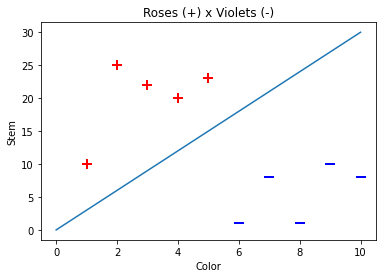

In [7]:
# Visualization - Plot the samples
for d, sample in zip(y_pred, X_test):
    # Plot the positive samples (Roses)
    if d == 1:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color="red")
    # Plot the positive samples (Violets)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color="blue")

# Print a possible hyperplane, that is seperating the two classes
plt.xlabel('Color')
plt.ylabel('Stem')
plt.title('Roses (+) x Violets (-)')
plt.plot([0,10],[0,30])
plt.show()

## Scikit learning metrics

<p style='text-align: justify;'>
The model metrics are used to evaluate the performance and accuracy of classification tasks. These topics are explained in detail in the multilayer artificial neuron section and all mathematical logic. As a parameter of all functions, it is necessary for the expected output and the output generated by the prediction of your artificial neuron. The first step is to import the packages for these metrics:
</p>

~~~python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
~~~

#### Accuracy
<p style='text-align: justify;'>
The accuracy is the proportion of instances correctly classified by the model.
</p>

In [4]:
print(accuracy_score(y_expected,y_pred))

1.0


#### Precision
<p style='text-align: justify;'>
The precision is the proportion of instances correctly classified as positive in relation to the total number of instances classified as positive. Precision measures the ability of the model to avoid false positives.
</p>

In [5]:
print(precision_score(y_expected,y_pred))

1.0


#### Recall
<p style='text-align: justify;'>
The recall, also known as the true positive rate, is the proportion of instances correctly classified as positive out of the total number of truly positive instances.
</p>

In [6]:
print(recall_score(y_expected,y_pred))

1.0


#### F1-Score
<p style='text-align: justify;'>
The F1-Score is a performance measure used to assess the overall accuracy of a classification model. It is calculated as the harmonic mean between Precision and Recall. 
</p>

In [7]:
print(f1_score(y_expected,y_pred))

1.0


## Summary

<p style='text-align: justify;'>
The main objective of this notebook is to create a model that identifies which category an object belongs to, using the package Intel® Scikit-learn on a simple dataset. The point of the previous example is to illustrate the nature of decision boundaries of different classifiers.
</p>

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [8]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

Congratulations, you have completed the first part of the learning objectives of the course! As a final exercise, successfully complete an end-to-end image classification problem in the assessment in [_05-artificial-neuron-assessment.ipynb_](05-artificial-neuron-assessment.ipynb).